In [1]:
import sys
import nltk
import sklearn
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# load the dataset
df= pd.read_csv('./sampleof10k.csv')

# 2 EAD

i have to do EAD in this steps
all cleanning step will be implement in SQL server

something need to show in EAD:
- summarise statistic
- proportion of fake and non fake in dataset
- the relation between "flagged and other feature"

## 2.1 Sumarize statistic

In [3]:
# Summarize statistic
print(round(df.describe(),2))
df.isna().sum()

       Unnamed: 0  reviewrating  reusefulcount  recoolcount  refunnycount  \
count    10000.00      10000.00       10000.00     10000.00      10000.00   
mean      4999.50          3.79           0.43         0.25          0.23   
std       2886.90          1.31           1.53         1.11          1.10   
min          0.00          1.00           0.00         0.00          0.00   
25%       2499.75          3.00           0.00         0.00          0.00   
50%       4999.50          4.00           0.00         0.00          0.00   
75%       7499.25          5.00           0.00         0.00          0.00   
max       9999.00          5.00          38.00        38.00         32.00   

       friendcount  fancount  tipcount  reviewcount  firstcount      ...       \
count     10000.00  10000.00  10000.00     10000.00    10000.00      ...        
mean         31.46      3.15      9.05        61.79        4.31      ...        
std         171.77     20.22     55.46       155.28       18.58

Unnamed: 0         0
reviewid           0
reviewerid         0
businessid         0
reviewcontent      0
reviewrating       0
reusefulcount      0
recoolcount        0
refunnycount       0
reviewDate         0
yelpjoindate       0
friendcount        0
fancount           0
tipcount           0
reviewcount        0
firstcount         0
usefulcount        0
coolcount          0
complimentcount    0
funnycount         0
busrating          0
buscateg           0
pricerange         0
filreviewcount     0
monmembership      0
firstreview        0
maxReviewDay       0
avgReviewDay       0
avgpostedrating    0
avgreviewlen       0
flagged            0
dtype: int64

<bound method DataFrame.corr of       Unnamed: 0                reviewid              reviewerid  \
0              0  FbkhIrlmiUVgBqxfQBpcWg  9YgFbqSz5FWTKkI-4kBypg   
1              1  6LbxSdSAgKOqtVCRKFqByw  80th4DFxg2GSXz82OATgeA   
2              2  9rmT7pRTx3GLfeCEYcXv5A  rcuxT7EbX0UhWBBnUarspg   
3              3  JKnfSiU2UatKqbqnFZRP_A  5emCDl321TReN64bxiEJGQ   
4              4  Sq2zg7I1vwov9TQjyKY-lQ  RGqWoD0FEsc9vWNpmm0prQ   
5              5  rJ06NjwScfvBmwOiiZWz3g  RWKeP1uPwaraFixxB8EQHg   
6              6  gFUyUo8cHJSBH9LKYx3Pzw  8d36keo3PhL85C0DkZbaOg   
7              7  qg0G3IlsUA7j2MFaClW7IQ  dhJjHJ1Hp4R8Rkg1eOl3Tw   
8              8               4jIx4C6Fa  Bhc85vXp139ei0mS6xaEWw   
9              9  yMdipWZZHdFWsn2De-qzwg  h6sRjwnrBe3SUOmlQe2Ipw   
10            10        4KKLMG59pkzsZVjM  EO-QqT7G-tGx5W4b3cHjmQ   
11            11  pyIC2Ku3WbDaWw2Vt-EREw  drOAcbsSGfx1Uaz-HjCfQQ   
12            12                  #NAME?  FbpXhRQJi1pmmflL3rJ1aA   
13            13

In [4]:
df['pricerange'] = df['pricerange'].fillna(0.0)

In [5]:
# checking data distribution
Y = df['flagged']

print(Y.value_counts())

print('% filtered reviews: {}'.format(round(Y.value_counts()[0]/len(Y)*100),3))
print('% non-filtered reviews: {}'.format(round(Y.value_counts()[1]/len(Y)*100),2))

N    5000
Y    5000
Name: flagged, dtype: int64
% filtered reviews: 50.0
% non-filtered reviews: 50.0


# 3. Data Preprocessing
## 3.1 Text data

steps:
- generate new fields: look at notebook
    + review length
    + ...
- text feature genereate: n-gram, POS, Bag of words, TF-IDF
- sentiment analysis
- opinion mining
- integrate text feature back to the dataframe


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# store the sms message data to diff dataframe
df['flagged'] = df['flagged'].astype('category')
df['buscateg'] = df['buscateg'].astype('category')
df['pricerange'] = df['pricerange'].astype('category')
df['firstreview'] = df['firstreview'].astype('category')

review_id = df['reviewid']
review_content = df['reviewcontent']
behavior_attr = df[['reviewrating',
                    'reusefulcount',
                    'recoolcount',
                    'refunnycount',
                    'friendcount',
                    'fancount',
                    'tipcount',
                    'reviewcount',
                    'firstcount',
                    'usefulcount',
                    'coolcount',
                    'complimentcount',
                    'funnycount',
                    'busrating',
                    'buscateg',
                    'pricerange',
                    'monmembership',
                    'firstreview',
                    'maxReviewDay',
                    'avgReviewDay',
                    'avgpostedrating',
                    'avgreviewlen'
                    ]]

# replace NaN with space
review_content = review_content.fillna('')



# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(df['flagged'])

behavior_attr['buscateg'] =  encoder.fit_transform(behavior_attr['buscateg'])
behavior_attr['pricerange'] = encoder.fit_transform(behavior_attr['pricerange'])
behavior_attr['firstreview'] = encoder.fit_transform(behavior_attr['firstreview'])

print(review_content[:10])

0    This place was amazing! My partner and I came ...
1    Visited 8/2009 YUM! We visited hubby's hometow...
2    Great atmosphere and great service all around....
3    OK so I cant recall how many times I have driv...
4    Hotel staff incredibly not helpful. The room t...
5    This place is definitely FRESH FRESH FRESH as ...
6    My boyfriend and I treated ourselves to a mini...
7    15 year patron of the original Uncommon Ground...
8    Prepare to be treated poorly.  A promise of 45...
9    Enjoyed another fabulous dinner last night.  J...
Name: reviewcontent, dtype: object


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

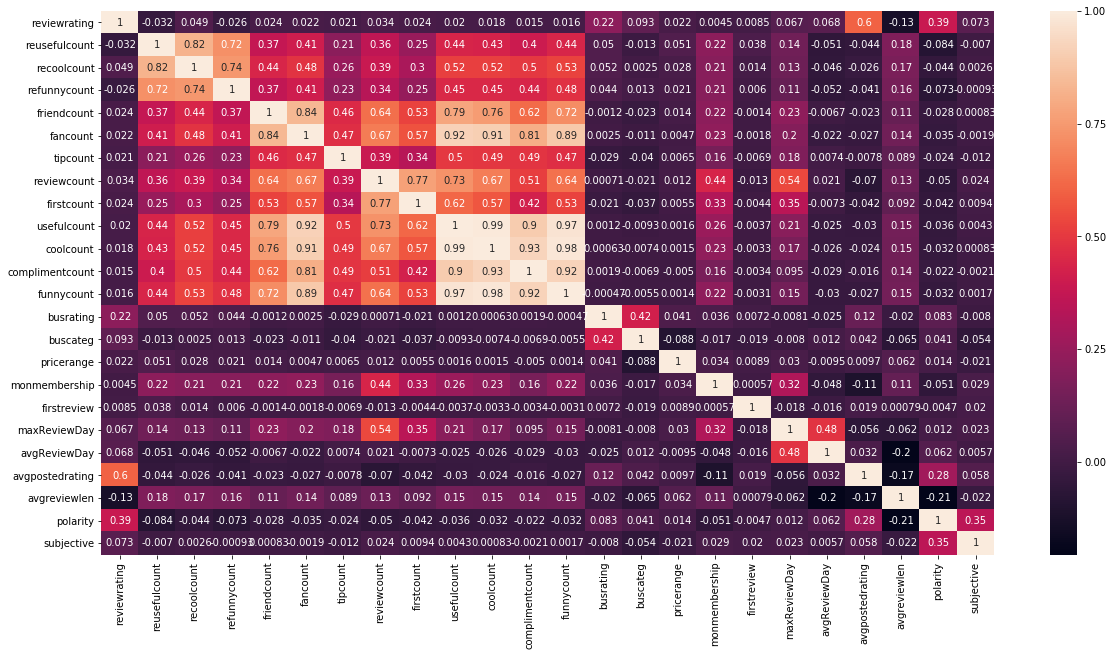

In [126]:
import seaborn as sn
behavior_attr.corr()
plt.figure(figsize=(20,10))
sn.heatmap(behavior_attr.corr(), annot=True)


In [8]:
# use regular expressions to replace email address, URLs, Phone numbers, other numbers

# Replace email addresses with 'email'
processed = review_content.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                      'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                   'webaddress')

# Replace moneu symbols with 'moneysymb' (€,£)
processed = processed.str.replace(r'€|\$|£', 'moneysymb')

# replac 10 digit phone numbers (formats include paranthesis, space, no space, dashes) with phonenumber
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                 'phonenumber')
# 
#replace numbers with 'number'
processed = processed.str.replace(r'\d+(\.\d+)?','number')

In [9]:
# Remove Punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# replace whitespac between terms with a single space
processed = processed.str.replace(r'\s+',' ') 

# remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$','')

In [10]:
# change words to lower case
processed = processed.str.lower()
print(processed)

0       this place was amazing my partner and i came h...
1       visited number number yum we visited hubby s h...
2       great atmosphere and great service all around ...
3       ok so i cant recall how many times i have driv...
4       hotel staff incredibly not helpful the room th...
5       this place is definitely fresh fresh fresh as ...
6       my boyfriend and i treated ourselves to a mini...
7       number year patron of the original uncommon gr...
8       prepare to be treated poorly a promise of numb...
9       enjoyed another fabulous dinner last night jum...
10      absolutely the worst hotel experience i ve eve...
11      so far my favorite sushi place in chicago food...
12      i was here about number months ago the food ov...
13      i had a cuban sandwich it was very good it was...
14      hmmm i really wanted to be in love with this p...
15      i am at a place called the greek islands i ord...
16               go immediately get the truffle egg toast
17      great 

In [11]:
# # remove stopwords from text sms
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
            term for term in x.split() if term not in stop_words))

In [12]:
print(processed)

0       place amazing partner came first time ever wai...
1       visited number number yum visited hubby hometo...
2       great atmosphere great service around family p...
3       ok cant recall many times driven past restaura...
4       hotel staff incredibly helpful room put us siz...
5       place definitely fresh fresh fresh someone els...
6       boyfriend treated mini weekend getaway past va...
7       number year patron original uncommon ground po...
8       prepare treated poorly promise number minutes ...
9       enjoyed another fabulous dinner last night jum...
10      absolutely worst hotel experience ever around ...
11      far favorite sushi place chicago food ordered ...
12      number months ago food overall good manager ow...
13      cuban sandwich good good one used tampa high s...
14      hmmm really wanted love place biggest fear lif...
15      place called greek islands ordered chicken rig...
16                   go immediately get truffle egg toast
17      great 

In [13]:
# remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
            ps.stem(term) for term in x.split()))


In [14]:
#processed.to_csv('processed_content.csv', header ='review_content')

# 4 Generate Text features
## 4.1 Bag of Words
### a. all words


## 4.2 Part of Speech

In [15]:
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
#tokenized review into word
#word_tok = processed.apply(word_tokenize)
#print(word_tok.head(10))


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
# [('I', 'PRP'), ("'m", 'VBP'), ('learning', 'VBG'), ('NLP', 'NNP')]
pos = processed.apply(word_tokenize).apply(pos_tag)

In [17]:
for i, sent in enumerate(pos):
    pos[i] =' '.join([word + '_' + postag for word, postag in sent])

In [18]:
print(pos[:10])


0    place_NN amaz_NN partner_NN came_VBD first_JJ ...
1    visit_NN number_NN number_NN yum_JJ visit_NN h...
2    great_JJ atmospher_RB great_JJ servic_NN aroun...
3    ok_JJ cant_JJ recal_JJ mani_NN time_NN driven_...
4    hotel_NN staff_NN incred_VBN help_NN room_NN p...
5    place_NN definit_NN fresh_JJ fresh_JJ fresh_JJ...
6    boyfriend_NN treat_NN mini_JJ weekend_NN getaw...
7    number_NN year_NN patron_RB origin_JJ uncommon...
8    prepar_NN treat_NN poorli_NN promis_IN number_...
9    enjoy_VB anoth_DT fabul_NN dinner_NN last_JJ n...
Name: reviewcontent, dtype: object


## 4.3 Cosine Similarity


In [19]:
# ML Packages For Vectorization of Text For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### a. Cosine Similarity by N-grams

In [20]:
corpus = processed
# using bi-gram
#cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#X_cv = cv.fit_transform(corpus) # Fit the Data
# create fi-idf vector
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1))
#X_tfidf= tfidf.fit_transform(corpus)

In [21]:
# create cosine similarity by tf-idf vector
CS_similarity_bigram =cosine_similarity(tfidf.fit_transform(corpus))

In [22]:
# get the feature shape
CS_similarity_bigram.shape

(10000, 10000)

In [23]:
CS_similarity_bigram

array([[1.        , 0.        , 0.0542976 , ..., 0.0466203 , 0.07984026,
        0.03959476],
       [0.        , 1.        , 0.06167563, ..., 0.0419655 , 0.        ,
        0.03300071],
       [0.0542976 , 0.06167563, 1.        , ..., 0.02360633, 0.06350651,
        0.00834639],
       ...,
       [0.0466203 , 0.0419655 , 0.02360633, ..., 1.        , 0.03996169,
        0.06271102],
       [0.07984026, 0.        , 0.06350651, ..., 0.03996169, 1.        ,
        0.03295736],
       [0.03959476, 0.03300071, 0.00834639, ..., 0.06271102, 0.03295736,
        1.        ]])

In [24]:
#del CS_similarity_bigram

### b. Cosine Similarity by Part of Speech

In [25]:
corpus = pos
# create fi-idf vector base on POS
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
pos_tfidf= tfidf.fit_transform(corpus)

#print(pos_tfidf.shape)

In [26]:
tfidf.get_feature_names()

['__nnp',
 '_capitol_nnp',
 'aa_in',
 'aaa_jj',
 'aaa_nn',
 'aaaaahhh_nn',
 'aaaaand_nn',
 'aaah_jj',
 'aacckkk_nn',
 'aah_jj',
 'aahhhh_nn',
 'aak_jj',
 'aaron_nn',
 'ab_in',
 'ab_jj',
 'aback_rb',
 'abandon_jj',
 'abandon_rb',
 'abbi_nn',
 'abbrevi_nn',
 'aberr_jj',
 'abid_nn',
 'abil_in',
 'abil_jj',
 'abil_nn',
 'abil_nns',
 'abil_rb',
 'abil_vbd',
 'abinth_jj',
 'abit_nn',
 'abl_in',
 'abl_jj',
 'abl_nn',
 'abl_nns',
 'abl_rb',
 'abl_vb',
 'abl_vbd',
 'abl_vbp',
 'abl_vbz',
 'abomin_jj',
 'abomin_nn',
 'abort_nn',
 'abound_in',
 'abound_nn',
 'aboutthat_rb',
 'abra_jj',
 'abras_jj',
 'abras_nns',
 'abrazo_nn',
 'abridg_rb',
 'abroad_rb',
 'abrubtli_nn',
 'abrupt_jj',
 'abrupt_vbp',
 'abruptli_jj',
 'abruptli_vb',
 'abruzzo_rb',
 'absenc_jj',
 'absenc_nn',
 'absent_jj',
 'absent_nn',
 'absinth_jj',
 'absolit_rb',
 'absolut_fw',
 'absolut_in',
 'absolut_jj',
 'absolut_nn',
 'absolut_nns',
 'absolut_rb',
 'absolut_rp',
 'absolut_vb',
 'absolut_vbd',
 'absolut_vbp',
 'absolut_vbz',
 '

In [27]:
import time

In [28]:
import time
start_time = time.time()

# create cosine similarity by tf-idf vector
CS_similarity_pos =cosine_similarity(pos_tfidf)

print("--- %s seconds ---" % (time.time() - start_time))

--- 3.967608690261841 seconds ---


In [29]:
# get the feature b
CS_similarity_pos

array([[1.        , 0.        , 0.04700922, ..., 0.04074961, 0.03586119,
        0.03173109],
       [0.        , 1.        , 0.04398393, ..., 0.03884415, 0.        ,
        0.02749997],
       [0.04700922, 0.04398393, 1.        , ..., 0.01347333, 0.01993384,
        0.00682551],
       ...,
       [0.04074961, 0.03884415, 0.01347333, ..., 1.        , 0.03281716,
        0.04422862],
       [0.03586119, 0.        , 0.01993384, ..., 0.03281716, 1.        ,
        0.00998219],
       [0.03173109, 0.02749997, 0.00682551, ..., 0.04422862, 0.00998219,
        1.        ]])

In [30]:
CS_similarity_pos

array([[1.        , 0.        , 0.04700922, ..., 0.04074961, 0.03586119,
        0.03173109],
       [0.        , 1.        , 0.04398393, ..., 0.03884415, 0.        ,
        0.02749997],
       [0.04700922, 0.04398393, 1.        , ..., 0.01347333, 0.01993384,
        0.00682551],
       ...,
       [0.04074961, 0.03884415, 0.01347333, ..., 1.        , 0.03281716,
        0.04422862],
       [0.03586119, 0.        , 0.01993384, ..., 0.03281716, 1.        ,
        0.00998219],
       [0.03173109, 0.02749997, 0.00682551, ..., 0.04422862, 0.00998219,
        1.        ]])

In [31]:
import pickle
# #save variable
with open('CS_similarity_pos', 'wb') as f:
    pickle.dump(CS_similarity_pos, f)

with open('CS_similarity_bigram', 'wb') as f:
    pickle.dump(CS_similarity_bigram, f)

    
    
#load variable
#with open(filename, ‘rb’) as f:
    #var_you_want_to_load_into = pickle.load(f)

In [32]:
# cs_matrix = CS_similarity_pos

# for i in range(0, cs_matrix.shape[0]):
#     cs_matrix[i,i] =0

In [33]:
#cs_matrix

## 4.4 Sentiment analysis


In [34]:
from textblob import TextBlob 
from textblob.sentiments import NaiveBayesAnalyzer

#Example how to get sentiment score of a text
#rv_sentiment = TextBlob("Came in on the early afternoon on Sunday. The food was tasty and priced well.",analyzer=NaiveBayesAnalyzer()).sentiment


### ** Note **
Because NaiveBayesAnalyzer() take too long to analyze the sentiment of whole dataset. I had tested and it take me more than 4hours. So, I choose move forward with pattern analyzer

In [35]:
# Polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
behavior_attr['polarity'] = processed.apply(pol)
behavior_attr['subjective'] = processed.apply(sub)

#reve_pos = []
#reve_pos += [TextBlob(x, analyzer= NaiveBayesAnalyzer()).sentiment.p_pos  for x in processed]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
#behavior_attr.to_csv('behavior_attr.csv')

In [37]:
# Let's plot the results
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [10, 8]

# x = polarity
# y = subjective
# plt.scatter(x, y, color='blue')
# #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
# plt.xlim(-.01, .12) 
    
# plt.title('Sentiment Analysis', fontsize=20)
# plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
# plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

# plt.show()

### Behavior feature
- behavior_attr: behavioral attributes
### text_feature
- processed: text content
- polarity: polarity of review
- CS_similarity_pos: consine similarity generated from POS
- CS_similarity_bigram: cosine similarity generated from bi-gram

# 5 Clusstering

In [38]:
# from nltk import cluster
# # dimensionality reduction
# distance = cluster.euclidean_distance
# clusterer = cluster.KMeansClusterer(10,distance)

# clusterers  = clusterer.cluster(CS_similarity_pos)


In [39]:
# means = clusterer.means()

In [40]:
# clusterer = cluster.EMClusterer(means)
# clusters = clusterer.cluster(CS_similarity_pos, True)

In [41]:
# cluter_pos =clusterer.classify(CS_similarity_pos) 

## 5.1 Clustering with PoS cosine similarity

In [42]:
from sklearn.mixture import GaussianMixture

def em_clustering(X, k ):
    
    gmm = GaussianMixture(n_components=k, random_state= 138)
    gmm.fit(X)
    return gmm



In [43]:
# em Clustering
start_time = time.time()
k= 4
gmm = em_clustering(CS_similarity_pos,k)


print("--- %s seconds ---" % (time.time() - start_time))

--- 456.823525428772 seconds ---


In [44]:
import gc
gc.collect()

0

In [45]:
# saving model for tommorow 
# import pickle

# # save the model to disk
# filename = 'cluster_model_pos.pkl'
# with open(filename, 'wb') as file:  
#     pickle.dump(gmm, file)

# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [46]:
cluster_pos = gmm.predict(CS_similarity_pos)

cluster_pos[:10]

array([0, 0, 3, 0, 2, 0, 2, 3, 3, 3])

In [150]:
#plot clustering result
dt_plt = pd.DataFrame({'Cluster':cluster_pos})
dt_plt =pd.DataFrame({'Cluster':dt_plt.groupby('Cluster')['Cluster'].count().index, 'count': dt_plt.groupby('Cluster')['Cluster'].count()})

In [132]:
dt_plt

,Cluster,count
Cluster,,
0,0,3967
1,1,1643
2,2,1046
3,3,3344


In [151]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


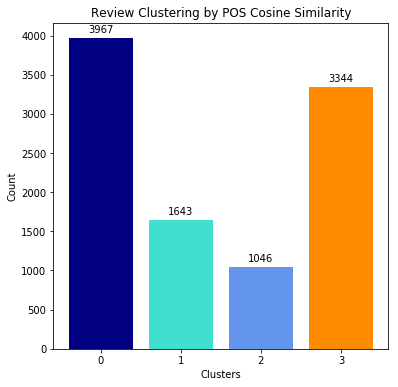

In [152]:


color_iter = ['navy', 'turquoise', 'cornflowerblue','darkorange']
plt.figure(figsize=(6,6))
plt.bar(dt_plt['Cluster'], dt_plt['count'],  color=color_iter )
plt.xlabel('Clusters')
plt.xticks(dt_plt['Cluster'])
plt.ylabel('Count')
plt.title('Review Clustering by POS Cosine Similarity')

for x,y in zip(dt_plt['Cluster'], dt_plt['count']):
    plt.annotate('{}'.format(y ),
                 xy=(x , y + 10),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

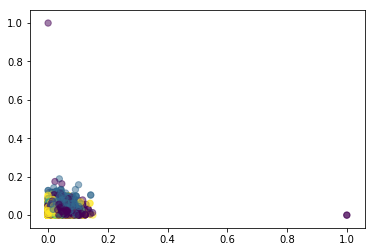

In [51]:
plt.scatter(CS_similarity_pos[:, 0], CS_similarity_pos[:, 1], c=cluster_pos, s=40, cmap='viridis', alpha =0.5)
plt.show()

In [52]:
# def draw_ellipse(position, covariance, ax=None, **kwargs):
#     """Draw an ellipse with a given position and covariance"""
#     ax = ax or plt.gca()
    
#     # Convert covariance to principal axes
#     if covariance.shape == (2, 2):
#         U, s, Vt = np.linalg.svd(covariance)
#         angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
#         width, height = 2 * np.sqrt(s)
#     else:
#         angle = 0
#         width, height = 2 * np.sqrt(covariance)
    
#     # Draw the Ellipse
#     for nsig in range(1, 4):
#         ax.add_patch(Ellipse(position, nsig * width, nsig * height,
#                              angle, **kwargs))
        
# def plot_gmm(gmm, lables_, X, label=True, ax=None):
#     ax = ax or plt.gca()
#     labels = lables_
#     if label:
#         ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, alpha =0.5)
#     else:
#         ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
#     ax.axis('equal')
    
#     w_factor = 0.2 / gmm.weights_.max()
# #     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
# #         draw_ellipse(pos, covar, alpha=w * w_factor)

In [53]:
# plot_gmm(gmm,cluster_pos, CS_similarity_pos)

In [54]:
# plt.figure()
# plt.pcolormesh(CS_similarity_pos,cmap='hot')
# plt.show()

In [55]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # plot it with seaborn
# plt.figure(figsize=(10,10))
# sns.heatmap(
#     CS_similarity_pos,
#     cmap='OrRd'
# )

In [56]:
uniform_data = np.random.rand(10, 12)

## 5.2 Clustering with Cosine similarity with uni-gram

In [57]:
from sklearn.mixture import GaussianMixture


# em Clustering
start_time = time.time()


gmm = em_clustering(CS_similarity_bigram,k)


print("--- %s seconds ---" % (time.time() - start_time))

--- 455.6839244365692 seconds ---


In [58]:
# from nltk.cluster.em import EMClusterer


# nltk_em = EMClusterer(gmm.means_)




In [59]:
cluster_ngram = gmm.predict(CS_similarity_bigram)

cluster_ngram[:10]

array([0, 0, 1, 0, 2, 0, 2, 1, 1, 1])

In [142]:
#plot clustering result
dt_plt = pd.DataFrame({'Cluster':cluster_ngram})
dt_plt = dt_plt.groupby('Cluster')['Cluster'].count()

In [144]:
dt_plt

Cluster
0    3971
1    3213
2    1074
3    1742
Name: Cluster, dtype: int64

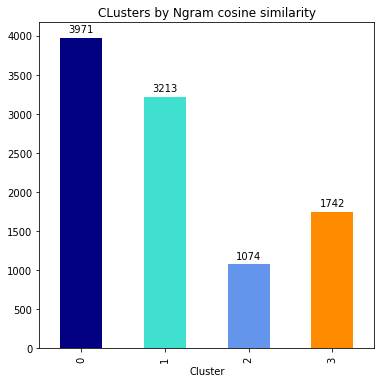

In [148]:
color_iter = ['navy', 'turquoise', 'cornflowerblue','darkorange']

plt.figure(figsize=(6,6))
dt_plt.plot(kind ='bar', color = color_iter)

for x,y in zip(dt_plt.index, dt_plt):
    plt.annotate('{}'.format(y ),
                 xy=(x , y + 10),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.title('CLustering by Ngram cosine similarity')
plt.show()

## 5.3 Evaluation & Integration cluster label with behavioral features

### b. Integrate data

In [63]:
df_pos=pd.concat([behavior_attr,
                 pd.DataFrame({'cluster':cluster_pos}).reindex(behavior_attr.index),
                 pd.DataFrame({'flagged':Y})],
#                  pd.DataFrame({'polarity':polarity}).reindex(behavior_attr.index),
#                  pd.DataFrame({'subjective':subjective}).reindex(behavior_attr.index)],
                 #pd.DataFrame(CS_similarity_bigram).reindex(behavior_attr.index)], 
                 axis=1) 
df_ngram=pd.concat([behavior_attr,
                 pd.DataFrame({'cluster':cluster_ngram}).reindex(behavior_attr.index),
                    pd.DataFrame({'flagged':Y})],
#                  pd.DataFrame({'polarity':polarity}).reindex(behavior_attr.index),
#                  pd.DataFrame({'subjective':subjective}).reindex(behavior_attr.index)],
#                  #pd.DataFrame(CS_similarity_bigram).reindex(behavior_attr.index)], 
                 axis=1) 



In [64]:
df_pos.to_csv('df_pos.csv')
df_ngram.to_csv('df_ngram.csv')

In [65]:
df_pos = df_pos.drop('flagged', axis = 1)
df_ngram = df_ngram.drop('flagged', axis = 1)

In [66]:
df_pos.head(10)

,reviewrating,reusefulcount,recoolcount,refunnycount,friendcount,fancount,tipcount,reviewcount,firstcount,usefulcount,...,pricerange,monmembership,firstreview,maxReviewDay,avgReviewDay,avgpostedrating,avgreviewlen,polarity,subjective,cluster
0,5,0,0,0,3,0,0,8,0,1,...,2,3,0,4,2,4,548,0.253571,0.589286,0
1,5,1,0,0,1,0,0,25,2,17,...,1,0,0,14,2,3,364,0.461905,0.578571,0
2,5,0,0,0,0,0,0,1,0,0,...,2,0,0,1,1,5,321,0.596429,0.633929,3
3,4,0,0,0,0,0,0,4,0,2,...,1,1,0,2,1,3,1274,0.168750,0.418750,0
4,1,0,0,0,1,1,0,4,1,4,...,1,28,0,1,1,2,344,-0.050000,0.200000,2
5,5,0,0,0,0,0,0,5,0,2,...,1,0,0,5,5,4,457,0.180000,0.444359,0
6,4,3,1,0,98,9,10,85,8,194,...,2,5,0,6,1,3,1372,0.115152,0.416667,2
7,1,0,0,0,0,0,0,2,0,0,...,1,0,0,1,1,3,53,-0.033333,0.866667,3
8,1,1,0,1,2,0,0,3,0,5,...,2,1,0,2,1,2,354,-0.400000,0.400000,3
9,5,1,1,0,2,0,0,14,1,7,...,1,30,0,10,3,4,383,-0.066667,0.505556,3


# 6 Building classify model

In [67]:
import statsmodels.api as sm

X = df_pos
y = Y


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  monmembership                  with p-value 0.0
Add  maxReviewDay                   with p-value 6.13438e-160
Add  avgReviewDay                   with p-value 1.65179e-83
Add  reusefulcount                  with p-value 2.80797e-68
Add  avgreviewlen                   with p-value 1.10816e-22
Add  coolcount                      with p-value 2.37624e-22
Add  reviewrating                   with p-value 4.62205e-21
Add  buscateg                       with p-value 2.51267e-10
Add  pricerange                     with p-value 5.77692e-08
Add  avgpostedrating                with p-value 1.19894e-07
Add  tipcount                       with p-value 3.98547e-07
Add  recoolcount                    with p-value 0.000186758
Add  polarity                       with p-value 0.00204887
Add  firstcount                     with p-value 0.00506717
Add  reviewcount                    with p-value 0.00323116
resulting features:
['monmembership', 'maxReviewDay', 'avgReviewDay', 'reusefulcount', 'avgrevi

In [68]:
df_filtered = df_pos[['monmembership', 'maxReviewDay', 'reusefulcount', 'avgReviewDay', 'complimentcount', 'avgreviewlen', 'reviewrating', 'avgpostedrating', 'recoolcount', 'tipcount', 'buscateg', 'polarity', 'fancount', 'firstreview', 'subjective', 'cluster']]

## 6.1 Svm model
### a. Pos similarity

In [69]:
# entire dataset
# test building classify model with consine similarity
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import metrics

# split the data into training and testing datasets
 

In [70]:
# standardize the independent variable
def fit_SVM_(X,Y, kernel ='rbf'):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    scaler = StandardScaler()  
    scaler.fit(X)
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    # SVM kernel: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed
    svclassifier = SVC(kernel='rbf')    
    svclassifier.fit(X_train, y_train)  
    y_pred = svclassifier.predict(X_test)  	## predict test se
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print('{} {} {} {}'.format(metrics.accuracy_score(y_test, y_pred),
                   1-metrics.accuracy_score(y_test, y_pred),
                   metrics.recall_score(y_test, y_pred),
                   metrics.precision_score(y_test, y_pred)))


In [71]:
import time
#
start_time = time.time()

fit_SVM_(df_pos,Y, kernel ='rbf')

print("--- %s seconds ---" % (time.time() - start_time))


[[833 174]
 [ 81 912]]
Accuracy: 0.8725
Error rate: 0.12749999999999995
Recall: 0.918429003021148
Precision: 0.8397790055248618
0.8725 0.12749999999999995 0.918429003021148 0.8397790055248618
--- 2.43927001953125 seconds ---


In [72]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('\n Classifying in cluster: {}'.format(i))
    fit_SVM_(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index], kernel ='rbf')


 Classifying in cluster: 0
[[313  95]
 [ 34 352]]
Accuracy: 0.8375314861460957
Error rate: 0.16246851385390426
Recall: 0.9119170984455959
Precision: 0.7874720357941835
0.8375314861460957 0.16246851385390426 0.9119170984455959 0.7874720357941835

 Classifying in cluster: 1
[[159  30]
 [ 10 130]]
Accuracy: 0.878419452887538
Error rate: 0.12158054711246202
Recall: 0.9285714285714286
Precision: 0.8125
0.878419452887538 0.12158054711246202 0.9285714285714286 0.8125

 Classifying in cluster: 2
[[115  19]
 [  8  68]]
Accuracy: 0.8714285714285714
Error rate: 0.12857142857142856
Recall: 0.8947368421052632
Precision: 0.7816091954022989
0.8714285714285714 0.12857142857142856 0.8947368421052632 0.7816091954022989

 Classifying in cluster: 3
[[229  77]
 [ 19 344]]
Accuracy: 0.8565022421524664
Error rate: 0.1434977578475336
Recall: 0.9476584022038568
Precision: 0.8171021377672208
0.8565022421524664 0.1434977578475336 0.9476584022038568 0.8171021377672208


In [73]:
# withou cluster
fit_SVM_(df_pos.drop('cluster',axis=1),Y, kernel ='rbf' )


[[836 171]
 [ 81 912]]
Accuracy: 0.874
Error rate: 0.126
Recall: 0.918429003021148
Precision: 0.8421052631578947
0.874 0.126 0.918429003021148 0.8421052631578947


In [74]:
fit_SVM_(df_pos.drop(['cluster', 'subjective'],axis=1),Y, kernel ='rbf' )

[[839 168]
 [ 79 914]]
Accuracy: 0.8765
Error rate: 0.12350000000000005
Recall: 0.9204431017119838
Precision: 0.844731977818854
0.8765 0.12350000000000005 0.9204431017119838 0.844731977818854


In [75]:
fit_SVM_(df_pos.drop(['cluster','polarity', 'subjective'],axis=1),Y, kernel ='rbf' )

[[838 169]
 [ 79 914]]
Accuracy: 0.876
Error rate: 0.124
Recall: 0.9204431017119838
Precision: 0.8439519852262235
0.876 0.124 0.9204431017119838 0.8439519852262235


### b. Unigram

In [76]:
import time
start_time = time.time()

fit_SVM_(df_ngram,Y, kernel ='rbf')

print("--- %s seconds ---" % (time.time() - start_time))


[[834 173]
 [ 81 912]]
Accuracy: 0.873
Error rate: 0.127
Recall: 0.918429003021148
Precision: 0.840552995391705
0.873 0.127 0.918429003021148 0.840552995391705
--- 2.476524591445923 seconds ---


In [77]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    fit_SVM_(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index], kernel ='rbf')

Classifying in cluster: 0
[[299  82]
 [ 30 384]]
Accuracy: 0.8591194968553459
Error rate: 0.14088050314465406
Recall: 0.927536231884058
Precision: 0.8240343347639485
0.8591194968553459 0.14088050314465406 0.927536231884058 0.8240343347639485
Classifying in cluster: 1
[[208  71]
 [ 28 336]]
Accuracy: 0.8460342146189735
Error rate: 0.15396578538102645
Recall: 0.9230769230769231
Precision: 0.8255528255528255
0.8460342146189735 0.15396578538102645 0.9230769230769231 0.8255528255528255
Classifying in cluster: 2
[[111  14]
 [ 10  80]]
Accuracy: 0.8883720930232558
Error rate: 0.11162790697674418
Recall: 0.8888888888888888
Precision: 0.851063829787234
0.8883720930232558 0.11162790697674418 0.8888888888888888 0.851063829787234
Classifying in cluster: 3
[[164  26]
 [ 15 144]]
Accuracy: 0.8825214899713467
Error rate: 0.11747851002865328
Recall: 0.9056603773584906
Precision: 0.8470588235294118
0.8825214899713467 0.11747851002865328 0.9056603773584906 0.8470588235294118


In [114]:
fit_SVM_(df_ngram.drop(['cluster'],axis=1),Y, kernel ='rbf' )

[[836 171]
 [ 81 912]]
Accuracy: 0.874
Error rate: 0.126
Recall: 0.918429003021148
Precision: 0.8421052631578947
0.874 0.126 0.918429003021148 0.8421052631578947


## 6.3 Random Forest Classifiers

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel

In [79]:

def RF_selction(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 500,max_depth = 100))
    sel.fit(X_train, y_train)
    sel.get_support()
    selected_feat= X_train.columns[(sel.get_support())]
    print(len(selected_feat))
    print(selected_feat)


In [80]:
RF_selction(df_pos,Y)

9
Index(['reusefulcount', 'friendcount', 'reviewcount', 'usefulcount',
       'coolcount', 'complimentcount', 'funnycount', 'monmembership',
       'avgreviewlen'],
      dtype='object')


In [81]:
def RF_classifier(X,Y, 
                  max_features_= 'auto', 
                  n_estimators_ = 100,
                  max_depth_ = None,
                  min_sample_leaf_ = 2):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    clf = RandomForestClassifier(max_features = max_features_, 
                                 n_estimators = n_estimators_,
                                 max_depth = max_depth_,
                                 min_samples_leaf = min_sample_leaf_)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  	## predict test set
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print('{} {} {} {}'.format(metrics.accuracy_score(y_test, y_pred),
                   1-metrics.accuracy_score(y_test, y_pred),
                   metrics.recall_score(y_test, y_pred),
                   metrics.precision_score(y_test, y_pred)))
    return(clf)

In [82]:
df_pos.head(5)

,reviewrating,reusefulcount,recoolcount,refunnycount,friendcount,fancount,tipcount,reviewcount,firstcount,usefulcount,...,pricerange,monmembership,firstreview,maxReviewDay,avgReviewDay,avgpostedrating,avgreviewlen,polarity,subjective,cluster
0,5,0,0,0,3,0,0,8,0,1,...,2,3,0,4,2,4,548,0.253571,0.589286,0
1,5,1,0,0,1,0,0,25,2,17,...,1,0,0,14,2,3,364,0.461905,0.578571,0
2,5,0,0,0,0,0,0,1,0,0,...,2,0,0,1,1,5,321,0.596429,0.633929,3
3,4,0,0,0,0,0,0,4,0,2,...,1,1,0,2,1,3,1274,0.168750,0.418750,0
4,1,0,0,0,1,1,0,4,1,4,...,1,28,0,1,1,2,344,-0.050000,0.200000,2


In [83]:
clf = RF_classifier(df_pos,Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 50)

[[905 102]
 [ 47 946]]
Accuracy: 0.9255
Error rate: 0.07450000000000001
Recall: 0.9526686807653575
Precision: 0.9026717557251909
0.9255 0.07450000000000001 0.9526686807653575 0.9026717557251909


            feature  importance
9       usefulcount    0.159746
7       reviewcount    0.129014
4       friendcount    0.104276
10        coolcount    0.099588
16    monmembership    0.067446
12       funnycount    0.060096
1     reusefulcount    0.052847
21     avgreviewlen    0.043731
11  complimentcount    0.040217
23       subjective    0.031585
22         polarity    0.031339


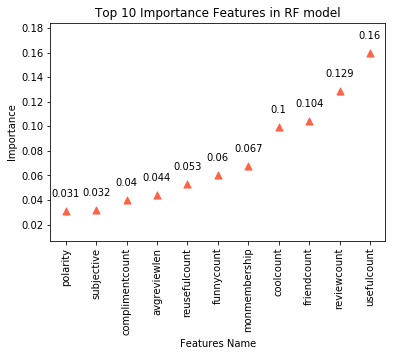

In [84]:
fi = pd.DataFrame({'feature': list(df_pos.columns),
                  'importance': clf.feature_importances_}).\
                   sort_values('importance', ascending = False)
print(fi.head(11))

dfplot = fi.head(11).sort_values('importance', ascending = True)

N=10
colors = np.random.rand(N)
plt.scatter(dfplot['feature'], dfplot['importance'], s =50, c='tomato', alpha=1, marker ='^')
plt.xticks(rotation=90)
plt.xlabel('Features Name')
plt.ylabel('Importance')
plt.title('Top 10 Importance Features in RF model')
for x,y in zip(range(0,11), dfplot['importance']):
    plt.annotate('{}'.format(round(y,3)),
                 xy=(x , y + 0.01),
                 xytext=(0, 0),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

In [85]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('\nClassifying in cluster: {}'.format(i))
    RF_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],n_estimators_=500,min_sample_leaf_= 2, max_depth_ = 100)


Classifying in cluster: 0
[[355  53]
 [ 18 368]]
Accuracy: 0.9105793450881612
Error rate: 0.08942065491183881
Recall: 0.9533678756476683
Precision: 0.8741092636579573
0.9105793450881612 0.08942065491183881 0.9533678756476683 0.8741092636579573

Classifying in cluster: 1
[[174  15]
 [  5 135]]
Accuracy: 0.939209726443769
Error rate: 0.06079027355623101
Recall: 0.9642857142857143
Precision: 0.9
0.939209726443769 0.06079027355623101 0.9642857142857143 0.9

Classifying in cluster: 2
[[126   8]
 [ 13  63]]
Accuracy: 0.9
Error rate: 0.09999999999999998
Recall: 0.8289473684210527
Precision: 0.8873239436619719
0.9 0.09999999999999998 0.8289473684210527 0.8873239436619719

Classifying in cluster: 3
[[267  39]
 [  9 354]]
Accuracy: 0.9282511210762332
Error rate: 0.0717488789237668
Recall: 0.9752066115702479
Precision: 0.9007633587786259
0.9282511210762332 0.0717488789237668 0.9752066115702479 0.9007633587786259


In [86]:
# without cluster
RF_classifier(df_pos.drop('cluster',axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 50 )

[[903 104]
 [ 50 943]]
Accuracy: 0.923
Error rate: 0.07699999999999996
Recall: 0.9496475327291037
Precision: 0.9006685768863419
0.923 0.07699999999999996 0.9496475327291037 0.9006685768863419


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
# without text generated features
RF_classifier(df_pos.drop(['polarity','subjective','cluster'],axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 50 )

[[903 104]
 [ 49 944]]
Accuracy: 0.9235
Error rate: 0.07650000000000001
Recall: 0.9506545820745217
Precision: 0.9007633587786259
0.9235 0.07650000000000001 0.9506545820745217 0.9007633587786259


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### b. Bigram

In [88]:
RF_classifier(df_ngram,Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[903 104]
 [ 51 942]]
Accuracy: 0.9225
Error rate: 0.07750000000000001
Recall: 0.9486404833836858
Precision: 0.9005736137667304
0.9225 0.07750000000000001 0.9486404833836858 0.9005736137667304


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('\nClassifying in cluster: {}'.format(i))
    RF_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)


Classifying in cluster: 0
[[331  50]
 [ 23 391]]
Accuracy: 0.9081761006289308
Error rate: 0.09182389937106916
Recall: 0.9444444444444444
Precision: 0.8866213151927438
0.9081761006289308 0.09182389937106916 0.9444444444444444 0.8866213151927438

Classifying in cluster: 1
[[236  43]
 [ 19 345]]
Accuracy: 0.9035769828926905
Error rate: 0.0964230171073095
Recall: 0.9478021978021978
Precision: 0.8891752577319587
0.9035769828926905 0.0964230171073095 0.9478021978021978 0.8891752577319587

Classifying in cluster: 2
[[115  10]
 [ 11  79]]
Accuracy: 0.9023255813953488
Error rate: 0.0976744186046512
Recall: 0.8777777777777778
Precision: 0.8876404494382022
0.9023255813953488 0.0976744186046512 0.8777777777777778 0.8876404494382022

Classifying in cluster: 3
[[173  17]
 [  7 152]]
Accuracy: 0.9312320916905444
Error rate: 0.06876790830945556
Recall: 0.9559748427672956
Precision: 0.8994082840236687
0.9312320916905444 0.06876790830945556 0.9559748427672956 0.8994082840236687


In [90]:
# withou cluster
RF_classifier(df_ngram.drop('cluster',axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[905 102]
 [ 50 943]]
Accuracy: 0.924
Error rate: 0.07599999999999996
Recall: 0.9496475327291037
Precision: 0.9023923444976076
0.924 0.07599999999999996 0.9496475327291037 0.9023923444976076


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
# withou text generated features
RF_classifier(df_ngram.drop(['cluster','polarity','subjective'],axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[911  96]
 [ 50 943]]
Accuracy: 0.927
Error rate: 0.07299999999999995
Recall: 0.9496475327291037
Precision: 0.9076034648700674
0.927 0.07299999999999995 0.9496475327291037 0.9076034648700674


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 6.3 Neural Network

### a. NN with pos similarity

In [92]:
from sklearn.neural_network import MLPClassifier

In [93]:
def NN_classifier(X, Y, hidden_layers_ = (5,2), activation_ ='relu',solver_ ='adam' , alphafloat_ =1e-5):

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138)

    clf = MLPClassifier(solver=solver_,
                        alpha=alphafloat_,
                        activation =activation_,
                        hidden_layer_sizes= hidden_layers_,
                        random_state=1)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    cm =  metrics.confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print('{} {} {} {}'.format(metrics.accuracy_score(y_test, y_pred),
                   1-metrics.accuracy_score(y_test, y_pred),
                   metrics.recall_score(y_test, y_pred),
                   metrics.precision_score(y_test, y_pred)))
#     plt.clf()
#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
#     classNames = ['0','1']
#     plt.title('NN Confusion Matrix - Test Data')
#     plt.ylabel('True Class')
#     plt.xlabel('Predicted Class')
#     tick_marks = np.arange(len(classNames))
#     plt.xticks(tick_marks, classNames, rotation=45)
#     plt.yticks(tick_marks, classNames)
#     s = [['TN','FP'], ['FN', 'TP']]
#     for i in range(2):
#         for j in range(2):
#             plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
#     plt.show()

In [130]:
# full clusters

NN_classifier(df_pos,Y,hidden_layers_ =(200,200,200,200), solver_='adam', activation_= 'tanh' )

[[881 126]
 [ 73 920]]
Accuracy: 0.9005
Error rate: 0.09950000000000003
Recall: 0.9264853977844915
Precision: 0.8795411089866156
0.9005 0.09950000000000003 0.9264853977844915 0.8795411089866156


In [95]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('\nClassifying in cluster: {}'.format(i))
    NN_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )


Classifying in cluster: 0
[[343  65]
 [ 29 357]]
Accuracy: 0.8816120906801007
Error rate: 0.11838790931989929
Recall: 0.9248704663212435
Precision: 0.8459715639810427
0.8816120906801007 0.11838790931989929 0.9248704663212435 0.8459715639810427

Classifying in cluster: 1
[[154  35]
 [  8 132]]
Accuracy: 0.8693009118541033
Error rate: 0.1306990881458967
Recall: 0.9428571428571428
Precision: 0.7904191616766467
0.8693009118541033 0.1306990881458967 0.9428571428571428 0.7904191616766467

Classifying in cluster: 2
[[125   9]
 [ 20  56]]
Accuracy: 0.861904761904762
Error rate: 0.13809523809523805
Recall: 0.7368421052631579
Precision: 0.8615384615384616
0.861904761904762 0.13809523809523805 0.7368421052631579 0.8615384615384616

Classifying in cluster: 3
[[271  35]
 [ 42 321]]
Accuracy: 0.8849028400597907
Error rate: 0.1150971599402093
Recall: 0.8842975206611571
Precision: 0.901685393258427
0.8849028400597907 0.1150971599402093 0.8842975206611571 0.901685393258427


In [96]:
#without cluster
NN_classifier(df_pos.drop('cluster',axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[823 184]
 [ 58 935]]
Accuracy: 0.879
Error rate: 0.121
Recall: 0.9415911379657603
Precision: 0.8355674709562109
0.879 0.121 0.9415911379657603 0.8355674709562109


### b NN with bigram

In [97]:
NN_classifier(df_ngram,Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[822 185]
 [ 41 952]]
Accuracy: 0.887
Error rate: 0.11299999999999999
Recall: 0.9587109768378651
Precision: 0.8372911169744943
0.887 0.11299999999999999 0.9587109768378651 0.8372911169744943


In [98]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    NN_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

Classifying in cluster: 0
[[309  72]
 [ 28 386]]
Accuracy: 0.8742138364779874
Error rate: 0.12578616352201255
Recall: 0.9323671497584541
Precision: 0.8427947598253275
0.8742138364779874 0.12578616352201255 0.9323671497584541 0.8427947598253275
Classifying in cluster: 1
[[223  56]
 [ 22 342]]
Accuracy: 0.8786936236391913
Error rate: 0.12130637636080865
Recall: 0.9395604395604396
Precision: 0.8592964824120602
0.8786936236391913 0.12130637636080865 0.9395604395604396 0.8592964824120602
Classifying in cluster: 2
[[114  11]
 [ 22  68]]
Accuracy: 0.8465116279069768
Error rate: 0.15348837209302324
Recall: 0.7555555555555555
Precision: 0.8607594936708861
0.8465116279069768 0.15348837209302324 0.7555555555555555 0.8607594936708861
Classifying in cluster: 3
[[161  29]
 [ 18 141]]
Accuracy: 0.8653295128939829
Error rate: 0.13467048710601714
Recall: 0.8867924528301887
Precision: 0.8294117647058824
0.8653295128939829 0.13467048710601714 0.8867924528301887 0.8294117647058824


In [99]:
# withou cluster
NN_classifier(df_ngram.drop('cluster',axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh')

[[823 184]
 [ 58 935]]
Accuracy: 0.879
Error rate: 0.121
Recall: 0.9415911379657603
Precision: 0.8355674709562109
0.879 0.121 0.9415911379657603 0.8355674709562109


In [100]:
# withou cluster
NN_classifier(df_ngram.drop(['cluster','polarity','subjective'],axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh')

[[885 122]
 [100 893]]
Accuracy: 0.889
Error rate: 0.11099999999999999
Recall: 0.8992950654582075
Precision: 0.8798029556650246
0.889 0.11099999999999999 0.8992950654582075 0.8798029556650246


## 6.4 Decision Tree


In [101]:
from sklearn import tree

In [115]:
def DT_clf(X, Y, max_features_= 'auto', 
                  max_depth_ = None,
                  min_sample_leaf_ = 2):
    from sklearn import tree
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138)

    clf = tree.DecisionTreeClassifier(max_features = max_features_, 
                                     max_depth = max_depth_,
                                     min_samples_leaf = min_sample_leaf_)

    clf.fit(X_train, y_train)
    
    #plot the tree
    #tree.plot_tree(clf.fit(X_train, y_train)) 
    
    y_pred = clf.predict(X_test)
    cm =  metrics.confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print('{} {} {} {}'.format(metrics.accuracy_score(y_test, y_pred),
                   1-metrics.accuracy_score(y_test, y_pred),
                   metrics.recall_score(y_test, y_pred),
                   metrics.precision_score(y_test, y_pred)))
#     plt.clf()
#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
#     classNames = ['0','1']
#     plt.title('NN Confusion Matrix - Test Data')
#     plt.ylabel('True Class')
#     plt.xlabel('Predicted Class')
#     tick_marks = np.arange(len(classNames))
#     plt.xticks(tick_marks, classNames, rotation=45)
#     plt.yticks(tick_marks, classNames)
#     s = [['TN','FP'], ['FN', 'TP']]
#     for i in range(2):
#         for j in range(2):
#             plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
#     plt.show()
    return clf
    

In [116]:
dtmodel = DT_clf(df_pos,Y,min_sample_leaf_= 2, max_depth_ = 15)

[[900 107]
 [130 863]]
Accuracy: 0.8815
Error rate: 0.11850000000000005
Recall: 0.8690835850956697
Precision: 0.8896907216494845
0.8815 0.11850000000000005 0.8690835850956697 0.8896907216494845


In [117]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    dt_k = DT_clf(df_pos.drop('cluster', axis =1),Y,min_sample_leaf_= 2, max_depth_ = 15)

Classifying in cluster: 0
[[884 123]
 [134 859]]
Accuracy: 0.8715
Error rate: 0.12849999999999995
Recall: 0.865055387713998
Precision: 0.8747454175152749
0.8715 0.12849999999999995 0.865055387713998 0.8747454175152749
Classifying in cluster: 1
[[881 126]
 [ 91 902]]
Accuracy: 0.8915
Error rate: 0.10850000000000004
Recall: 0.9083585095669687
Precision: 0.877431906614786
0.8915 0.10850000000000004 0.9083585095669687 0.877431906614786
Classifying in cluster: 2
[[890 117]
 [114 879]]
Accuracy: 0.8845
Error rate: 0.11550000000000005
Recall: 0.8851963746223565
Precision: 0.8825301204819277
0.8845 0.11550000000000005 0.8851963746223565 0.8825301204819277
Classifying in cluster: 3
[[899 108]
 [121 872]]
Accuracy: 0.8855
Error rate: 0.11450000000000005
Recall: 0.878147029204431
Precision: 0.889795918367347
0.8855 0.11450000000000005 0.878147029204431 0.889795918367347


In [118]:
# withou cluster
dtmodel = DT_clf(df_pos.drop(['cluster'],axis=1),Y,min_sample_leaf_= 2, max_depth_ = 15)

[[884 123]
 [ 96 897]]
Accuracy: 0.8905
Error rate: 0.10950000000000004
Recall: 0.9033232628398792
Precision: 0.8794117647058823
0.8905 0.10950000000000004 0.9033232628398792 0.8794117647058823


### b. Unigram

In [119]:
dtmodel = DT_clf(df_ngram,Y,min_sample_leaf_= 2, max_depth_ = 15)

[[886 121]
 [113 880]]
Accuracy: 0.883
Error rate: 0.11699999999999999
Recall: 0.8862034239677744
Precision: 0.8791208791208791
0.883 0.11699999999999999 0.8862034239677744 0.8791208791208791


In [120]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    dt_k = DT_clf(df_cluster0.drop('cluster', axis =1),Y[df_cluster0.index],min_sample_leaf_= 2, max_depth_ = 15)

Classifying in cluster: 0
[[321  60]
 [ 53 361]]
Accuracy: 0.8578616352201258
Error rate: 0.14213836477987418
Recall: 0.8719806763285024
Precision: 0.8574821852731591
0.8578616352201258 0.14213836477987418 0.8719806763285024 0.8574821852731591
Classifying in cluster: 1
[[239  40]
 [ 50 314]]
Accuracy: 0.8600311041990669
Error rate: 0.13996889580093308
Recall: 0.8626373626373627
Precision: 0.8870056497175142
0.8600311041990669 0.13996889580093308 0.8626373626373627 0.8870056497175142
Classifying in cluster: 2
[[118   7]
 [ 18  72]]
Accuracy: 0.8837209302325582
Error rate: 0.11627906976744184
Recall: 0.8
Precision: 0.9113924050632911
0.8837209302325582 0.11627906976744184 0.8 0.9113924050632911
Classifying in cluster: 3
[[167  23]
 [ 29 130]]
Accuracy: 0.8510028653295129
Error rate: 0.14899713467048714
Recall: 0.8176100628930818
Precision: 0.8496732026143791
0.8510028653295129 0.14899713467048714 0.8176100628930818 0.8496732026143791


In [121]:
# without cluster
dtmodel = DT_clf(df_ngram.drop(['cluster'],axis=1),Y,min_sample_leaf_= 2, max_depth_ = 15)

[[891 116]
 [116 877]]
Accuracy: 0.884
Error rate: 0.11599999999999999
Recall: 0.8831822759315207
Precision: 0.8831822759315207
0.884 0.11599999999999999 0.8831822759315207 0.8831822759315207


[[875 132]
 [ 90 903]]
Accuracy: 0.889
Error rate: 0.11099999999999999
Recall: 0.9093655589123867
Precision: 0.8724637681159421


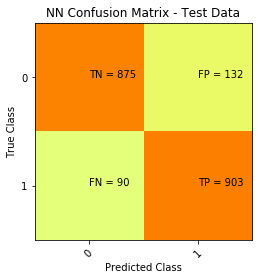

In [109]:
# dt for visualize
# chosing 5 level of depth 
dtmodel = DT_clf(df_ngram,Y,min_sample_leaf_= 2, max_depth_ = 10)

In [110]:
import graphviz 
from IPython.display import SVG
#from StringIO import StringIO

dot_data= tree.export_graphviz(dtmodel, out_file="ngram_8cluster.dot",
                               feature_names=df_ngram.columns) 



In [111]:
# import os
# #./usr/lib/x86_64-linux-gnu/graphviz
# os.environ["PATH"] += os.pathsep + './usr/bin/'

In [112]:
# with open("mytree.dot") as f:
#     dot_graph = f.read()
# #graphviz.Source(dot_graph)
# graph = graphviz.Source(dot_graph)
# graph.render("image",view=True)